In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense

In [2]:
# Load the imdb dataset

# vocabulary size
max_features=10000  

(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)

In [3]:
print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}')

Training data shape: (25000,), Training labels shape: (25000,)
Testing data shape: (25000,), Testing labels shape: (25000,)


In [4]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
y_train[0]

1

In [6]:
# Mapping of words index to words
word_index=imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [7]:
reverse_word_index = {value: key for key, value in word_index.items()}
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [8]:
sample_review = X_train[0]
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sample_review])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Pour chaque nombre i dans la review

On retire 3 (i - 3) car les indices 0,1,2 sont réservés dans IMDB :

0 : padding

1 : start-of-sequence

2 : unknown word

reverse_word_index.get(i - 3, '?') :

récupère le mot associé à l’indice

sinon met '?' si inconnu

join assemble tout en phrase texte

In [9]:
max_len=500

X_train=sequence.pad_sequences(X_train,maxlen=max_len)
X_test=sequence.pad_sequences(X_test,maxlen=max_len)

In [10]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [11]:
# Train simple RNN
model=Sequential()
# Embedding layers
model.add(Embedding(max_features,128,input_length=max_len))  # dim=128
model.add(SimpleRNN(128,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1313025 (5.01 MB)
Trainable params: 1313025 (5.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
# Early stopping Callback
from tensorflow.keras.callbacks import EarlyStopping

EarlyStopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [15]:
EarlyStopping

In [16]:
# Train the model
history = model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2,callbacks=[EarlyStopping])

Epoch 1/10


625/625 [==============================] - 46s 72ms/step - loss: 1284.8079 - accuracy: 0.6400 - val_loss: 0.5678 - val_accuracy: 0.6834
Epoch 2/10
625/625 [==============================] - 37s 59ms/step - loss: 1.5595 - accuracy: 0.7837 - val_loss: 0.4572 - val_accuracy: 0.7890
Epoch 3/10
625/625 [==============================] - 29s 46ms/step - loss: 0.3283 - accuracy: 0.8625 - val_loss: 0.4290 - val_accuracy: 0.8064
Epoch 4/10
625/625 [==============================] - 30s 47ms/step - loss: 0.2410 - accuracy: 0.9055 - val_loss: 0.4366 - val_accuracy: 0.8246
Epoch 5/10
625/625 [==============================] - 30s 48ms/step - loss: 0.1761 - accuracy: 0.9331 - val_loss: 0.4360 - val_accuracy: 0.8258
Epoch 6/10
625/625 [==============================] - 29s 47ms/step - loss: 0.1339 - accuracy: 0.9496 - val_loss: 0.5012 - val_accuracy: 0.8376
Epoch 7/10
625/625 [==============================] - 30s 47ms/step - loss: 0.0990 - accuracy: 0.9648 - val_loss: 0.5161 - val_accu

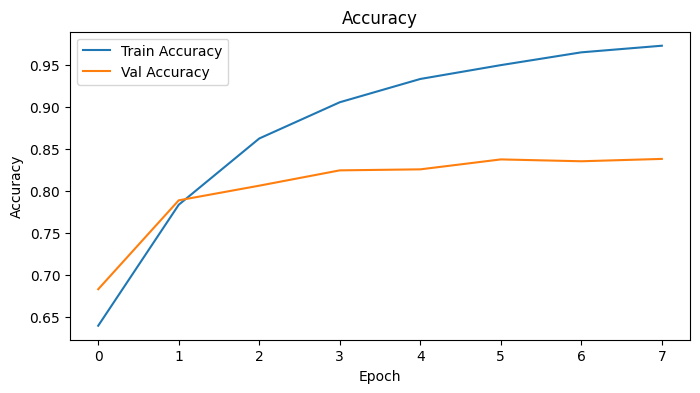

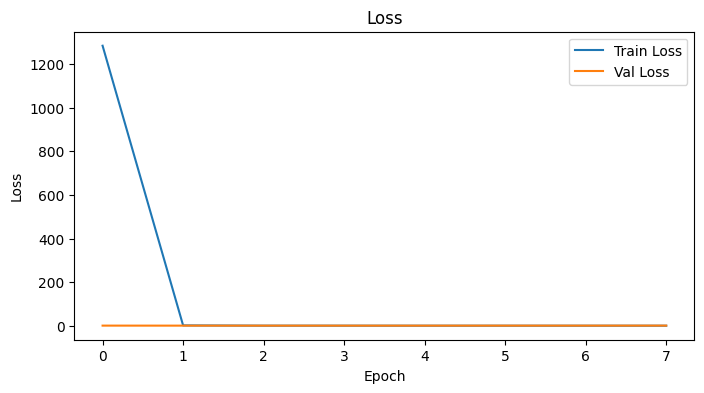

In [18]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
model.save('simple_rnn_imdb.h5')

c:\Users\nico_\Desktop\Data science bootcamp\Deep Learning\RNN project\rnnvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Overfitting

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

model2 = Sequential()
model2.add(Embedding(max_features, 128, input_length=max_len, mask_zero=True))
model2.add(SimpleRNN(128, activation='tanh', dropout=0.3, recurrent_dropout=0.3))  # tanh (évite vanishing) plus approprié pour les RNN, dropout pour l'overfitting
model2.add(BatchNormalization())  # pour l'overfitting
model2.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=1e-3, clipnorm=1.0)  # clipnorm pour éviter l'explosion de gradiant et l'entraînement instable
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history2 = model2.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2,callbacks=[es])

Epoch 1/10
625/625 [==============================] - 78s 123ms/step - loss: 0.7744 - accuracy: 0.5015 - val_loss: 0.6915 - val_accuracy: 0.5282
Epoch 2/10
625/625 [==============================] - 94s 150ms/step - loss: 0.6959 - accuracy: 0.5209 - val_loss: 0.6909 - val_accuracy: 0.5286
Epoch 3/10
625/625 [==============================] - 168s 270ms/step - loss: 0.6853 - accuracy: 0.5470 - val_loss: 0.6689 - val_accuracy: 0.5804
Epoch 4/10
625/625 [==============================] - 126s 202ms/step - loss: 0.6066 - accuracy: 0.6603 - val_loss: 0.4983 - val_accuracy: 0.7740
Epoch 5/10
625/625 [==============================] - 165s 265ms/step - loss: 0.4923 - accuracy: 0.7719 - val_loss: 0.5222 - val_accuracy: 0.7748
Epoch 6/10
625/625 [==============================] - 110s 177ms/step - loss: 0.4406 - accuracy: 0.8054 - val_loss: 0.4991 - val_accuracy: 0.8056
Epoch 7/10
625/625 [==============================] - 137s 219ms/step - loss: 0.4180 - accuracy: 0.8194 - val_loss: 0.4980 - v

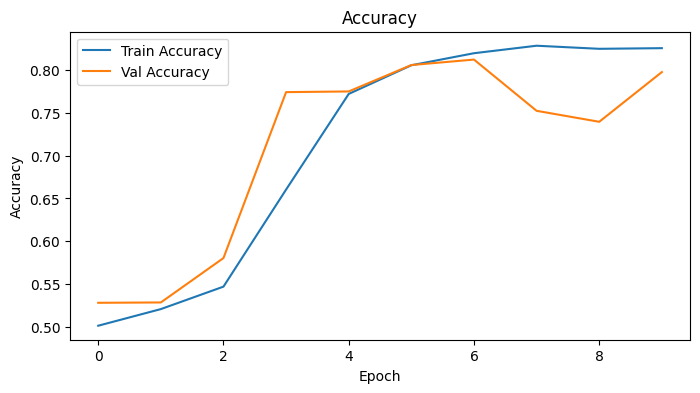

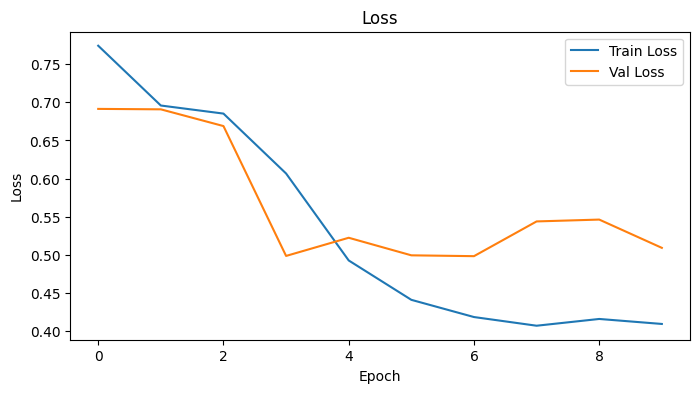

In [26]:
# Accuracy
plt.figure(figsize=(8,4))
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(8,4))
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Modèle plus stable que la version ReLU, généralise mieux et pas d’explosion de gradients

In [27]:
model2.save('simple_rnn_imdb2.h5')

c:\Users\nico_\Desktop\Data science bootcamp\Deep Learning\RNN project\rnnvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
